In [1]:
from grid import Grid
import numpy as np
from agent import Agent
import time
import pickle
from matplotlib import pyplot as plt

In [2]:
def create_test_grids(amount=1000, size=5):
    grids = []
    for j in range(amount):
        grids.append(Grid(size, random=True))
    with open('test_grids.pickle', 'wb') as fil:
        pickle.dump(grids, fil)


In [3]:
#create_test_grids(1000)


In [4]:
def load_test_grids():
    with open('test_grids.pickle', 'rb') as fil:
        grids = pickle.load(fil)
    return grids

In [5]:
grids = load_test_grids()

In [6]:
def test_MC_first_visit(testgrids, iterations=100, model_based=True, nn_init=False):
    #reward_dist = {}
    rewards = []
    for testgrid in testgrids:
        a = Agent()
        if model_based:
            if nn_init:
                Q, policy = a.mc_first_visit_nn_init(testgrid.copy(), iterations)
            else:
                Q, policy = a.mc_first_visit_control(testgrid.copy(), iterations) # Q value key is (self.agent_pos,self.train.pos,list(self.other_agents.positions)[0])
            grids, action_values, reward = a.run_final_policy(testgrid.copy(), Q, nn_init=nn_init)
        else:
            reward = a.run_model_free_policy(testgrid.copy())
        '''if reward not in reward_dist:
            reward_dist[reward] = 1
        else:
            reward_dist[reward] += 1'''
        rewards.append(reward)
        
    return np.mean(rewards)

In [7]:
iterations = [1, 3, 5, 10, 30, 100]#, 300, 1000]
scores = []

for it in iterations:
    score = test_MC_first_visit(grids, it, nn_init=False)
    print(it, score)
    scores.append(score)

1 -1.0874000000000001
3 -0.8707
5 -0.7175
10 -0.45339999999999997
30 -0.268
100 -0.2339


In [8]:
# Model based results, no init
# it, score
# 1 -1.0611
# 3 -0.9010999999999999
# 10 -0.44580000000000003
# 30 -0.2856
# 100 -0.2311
# 300 -0.21
# 1000 -0.2019

# Model based results, with init
# 1 -0.3517
# 3 -0.2993
# 5 -0.27679999999999993
# 10 -0.2627
# 30 -0.2398
# 100 -0.2105

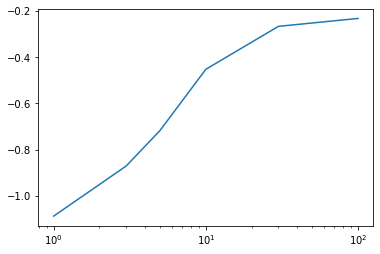

In [9]:
plt.plot(iterations, scores)
plt.xscale("log")

In [10]:
print(test_MC_first_visit(grids, model_based=False))

-0.4048
